This notebook picks a bunch of healpix pixels, and places a mock cluster at the center of each

And adds shear to background objects

In [1]:
from importlib import reload
import fitsio as fio
import numpy as np
import pandas as pd

import healpy as hp
import copy
import sys
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.decomposition as decomp


import matplotlib as mpl
import subprocess as sp
import scipy.interpolate as interpolate
import pickle as pickle
import glob
import healpy as hp

import multiprocessing as mp

import synthetic.tools as tools
import synthetic.emulator.emulator as emulator
import synthetic.emulator.indexer as indexer
import synthetic.emulator.reader as reader

In [23]:
folder_path = "/e/ocean1/users/vargatn/LSST/SYNTHETIC/"

In [2]:
in_path = "/e/ocean1/users/vargatn/LSST/DC2_1.1.4/"

In [3]:
fnames = glob.glob(in_path + "*pixel*h5")
pixels = np.array([int(tmp.split("-")[-1].split(".")[0]) for tmp in fnames])

In [4]:
pixel_id = 0

In [6]:
alltable = pd.read_hdf(fnames[pixel_id], key='data')
ra_cen = np.mean(alltable["ra"])
dec_cen = np.mean(alltable["dec"])

In [7]:
pad = 0.1 # degree
mag_max = 25

ii = (np.abs(alltable["ra"] - ra_cen) < pad) & (np.abs(alltable["dec"] - dec_cen) < pad) & (alltable['mag_i'] < mag_max)
table = alltable[ii]
ra = (table["ra"] - ra_cen) * 60. 
dec = (table["dec"] - dec_cen) * 60.

# This is the pre injection canvas

In [20]:
pixel_scale = 0.264
mock_catalog = pd.DataFrame()
mock_catalog["RA"] = table["ra"]
mock_catalog["DEC"] = table["dec"]
mock_catalog["X"] = (table["ra"] - ra_cen) * 60 * 60 / pixel_scale
mock_catalog["Y"] = (table["dec"] - dec_cen) * 60 * 60 / pixel_scale

mock_catalog["MAG_I"] = table["mag_i"]
mock_catalog["TSIZE"] = table["size_true"]
mock_catalog["FRACDEV"] = 0
mock_catalog["FLUX_I"] = tools.toflux(table["mag_i"])
mock_catalog["G1"] = table["ellipticity_1_true"]
mock_catalog["G2"] = table["ellipticity_2_true"]

In [21]:
mock_catalog["X"].min(), mock_catalog["X"].max()
mock_catalog["Y"].min(), mock_catalog["Y"].max()

(-1363.190400985139, 1362.2909413348143)

In [128]:
table["ellipticity_1_true"]

48         -0.285715
335         0.104678
361        -0.042492
425        -0.031142
426        -0.345186
              ...   
16557203   -0.073390
16557487    0.003298
16560743   -0.285873
16589159    0.001880
16610321   -0.004273
Name: ellipticity_1_true, Length: 4621, dtype: float64

In [127]:
table.columns

Index(['redshift_true', 'mag_g', 'halo_id', 'Mag_true_i_lsst_z0', 'dec',
       'shear_1', 'ellipticity_1_true', 'Mag_true_z_lsst_z0',
       'Mag_true_r_lsst_z0', 'mag_r', 'size_true', 'ellipticity_2_true',
       'Mag_true_g_lsst_z0', 'stellar_mass', 'mag_i', 'shear_2', 'is_central',
       'ra', 'mag_z', 'halo_mass', 'galaxy_id'],
      dtype='object')

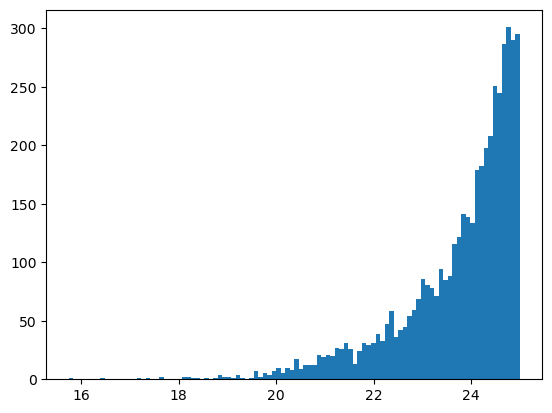

In [123]:
plt.hist(table['mag_i'], bins=100)
None

In [124]:
len(table) / (0.1 * 60)**2.

128.36111111111111

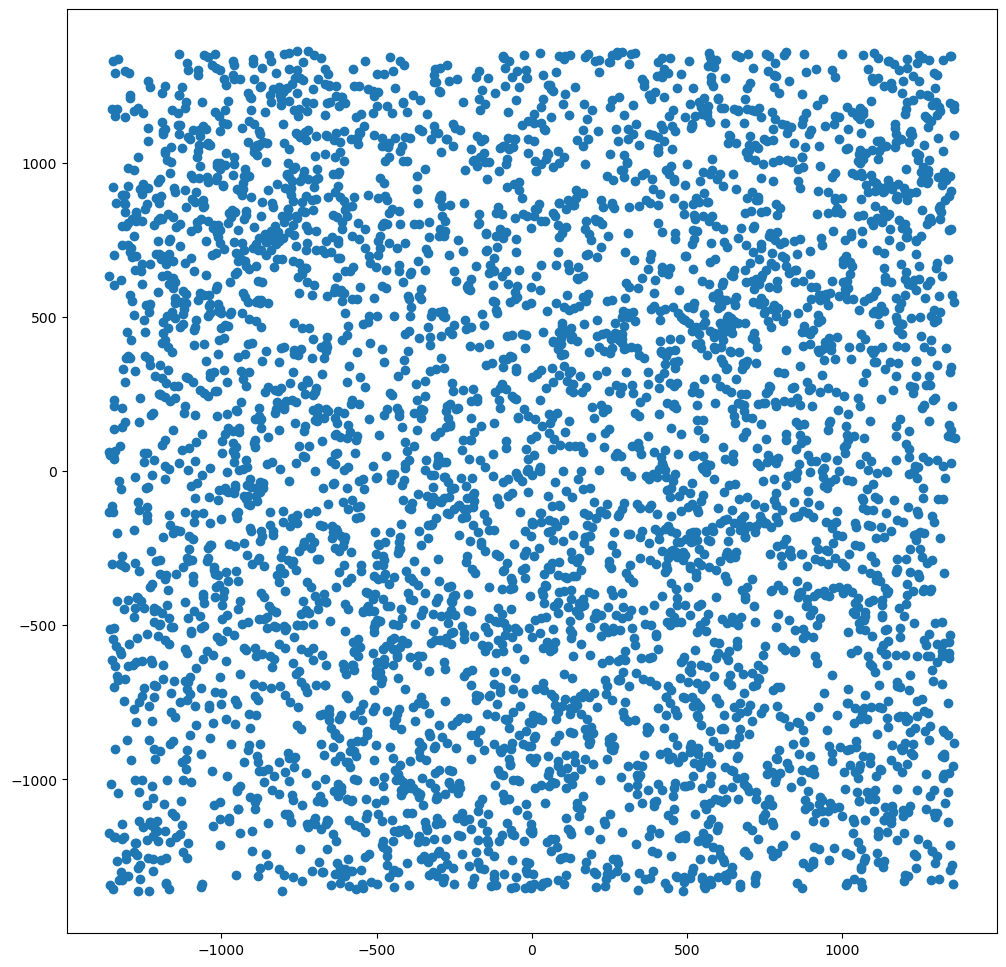

In [22]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)


ax.scatter(mock_catalog["X"], mock_catalog["Y"])

In [ ]:
name = 'test_canvas_grid'
print(name)
fr = frame.Frame(mock_catalog, name=name, noise_std=1, canvas_size=canvas_size)
fr.render()
fr.extract()